In [1]:
import pandas as pd 
import numpy as np

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
commodity_tickers = [
    'CL=F',  # Crude Oil
    'HO=F',  # Heating Oil
    'NG=F',  # Natura Gas
    'RB=F'   # RB Gasoline
]

In [3]:
df = yf.download(' '.join(commodity_tickers), group_by='ticker')

[*********************100%***********************]  4 of 4 completed


In [4]:
df

CL=F                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2000-08-23  31.950001  32.799999  31.950001  32.049999  32.049999   79385.0   
2000-08-24  31.900000  32.240002  31.400000  31.629999  31.629999   72978.0   
2000-08-25  31.700001  32.099998  31.320000  32.049999  32.049999   44601.0   
2000-08-28  32.040001  32.919998  31.860001  32.869999  32.869999   46770.0   
2000-08-29  32.820000  33.029999  32.560001  32.720001  32.720001   49131.0   
...               ...        ...        ...        ...        ...       ...   
2021-01-13  53.310001  53.930000  52.580002  52.910000  52.910000  429898.0   
2021-01-14  52.840000  53.750000  52.240002  53.570000  53.570000  390087.0   
2021-01-15  53.799999  53.830002  51.830002  52.360001  52.360001  165668.0   
2021-01-19  52.000000  53.130001  51.759998  52.980000  52.980000  165668.0   
2021-01-20  53.130001  53.790001  53.049999  53.279999  53.279999   21202.0   

              RB=F                          ...    HO=F                    \
              Open    High     Low   Close  ...     Low   Close Adj Close   
Date                                        ...                             
2000-08-23     NaN     NaN     NaN     NaN  ...     NaN     NaN       NaN   
2000-08-24     NaN     NaN     NaN     NaN  ...     NaN     NaN       NaN   
2000-08-25     NaN     NaN     NaN     NaN  ...     NaN     NaN       NaN   
2000-08-28     NaN     NaN     NaN     NaN  ...     NaN     NaN       NaN   
2000-08-29     NaN     NaN     NaN     NaN  ...     NaN     NaN       NaN   
...            ...     ...     ...     ...  ...     ...     ...       ...   
2021-01-13  1.5584  1.5756  1.5344  1.5488  ...  1.5832  1.5989    1.5989   
2021-01-14  1.5473  1.5607  1.5183  1.5539  ...  1.5830  1.6194    1.6194   
2021-01-15  1.5597  1.5624  1.5160  1.5284  ...  1.5724  1.5929    1.5929   
2021-01-19  1.5181  1.5489  1.5115  1.5381  ...  1.5776  1.5987    1.5987   
2021-01-20  1.5381  1.5635  1.5367  1.5377  ...  1.5943  1.5945    1.5945   

                      NG=F                                           
             Volume   Open   High    Low  Close Adj Close    Volume  
Date                                                                 
2000-08-23      NaN    NaN    NaN    NaN    NaN       NaN       NaN  
2000-08-24      NaN    NaN    NaN    NaN    NaN       NaN       NaN  
2000-08-25      NaN    NaN    NaN    NaN    NaN       NaN       NaN  
2000-08-28      NaN    NaN    NaN    NaN    NaN       NaN       NaN  
2000-08-29      NaN    NaN    NaN    NaN    NaN       NaN       NaN  
...             ...    ...    ...    ...    ...       ...       ...  
2021-01-13  46764.0  2.737  2.826  2.708  2.727     2.727  169240.0  
2021-01-14  47079.0  2.742  2.791  2.660  2.666     2.666  163043.0  
2021-01-15  50525.0  2.672  2.800  2.636  2.737     2.737  150994.0  
2021-01-19  50525.0  2.652  2.673  2.523  2.546     2.546  150994.0  
2021-01-20  16931.0  2.544  2.567  2.454  2.549     2.549  119849.0  

[5131 rows x 24 columns]

In [5]:
df.columns = df.columns.map('_'.join)
df = df[list(map(lambda x: x + '_Close', commodity_tickers))]
df.columns = df.columns.map(lambda x: x.split('_')[0])
df

,CL=F,HO=F,NG=F,RB=F
Date,,,,
2000-08-23,32.049999,NaN,NaN,NaN
2000-08-24,31.629999,NaN,NaN,NaN
2000-08-25,32.049999,NaN,NaN,NaN
2000-08-28,32.869999,NaN,NaN,NaN
2000-08-29,32.720001,NaN,NaN,NaN
...,...,...,...,...
2021-01-13,52.910000,1.5989,2.727,1.5488
2021-01-14,53.570000,1.6194,2.666,1.5539
2021-01-15,52.360001,1.5929,2.737,1.5284


In [6]:
df = df.dropna()

In [7]:
def plot_commodity(commodity):
    c = df[commodity]
    
    plt.figure(figsize=(25, 8))
    plt.grid(True)
    plt.title(commodity)
    sns.lineplot(data=c)

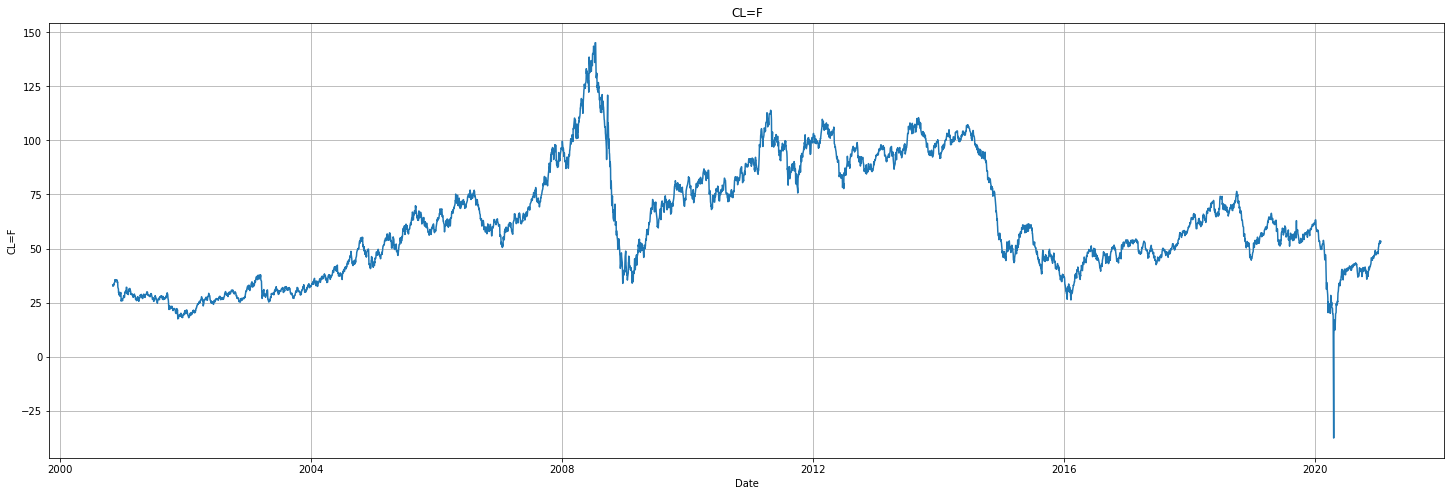

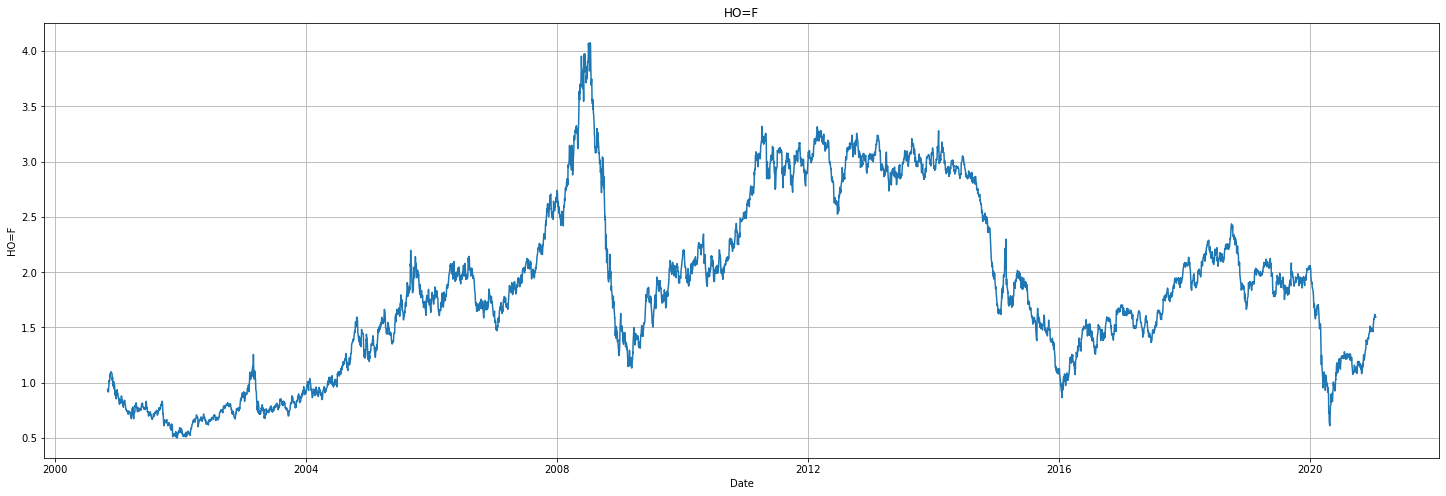

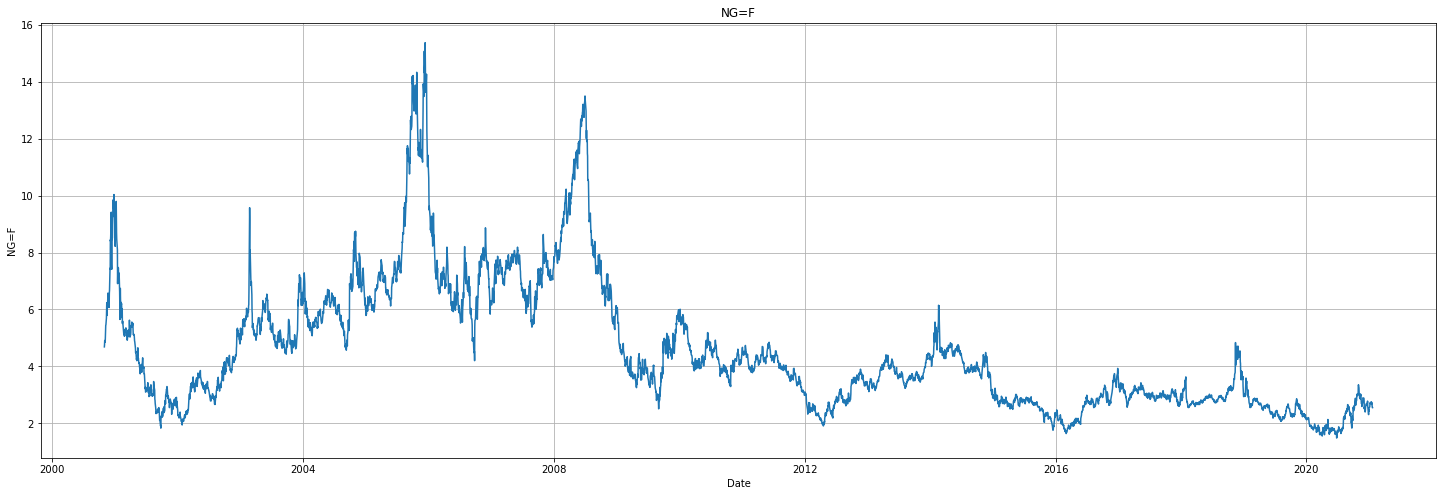

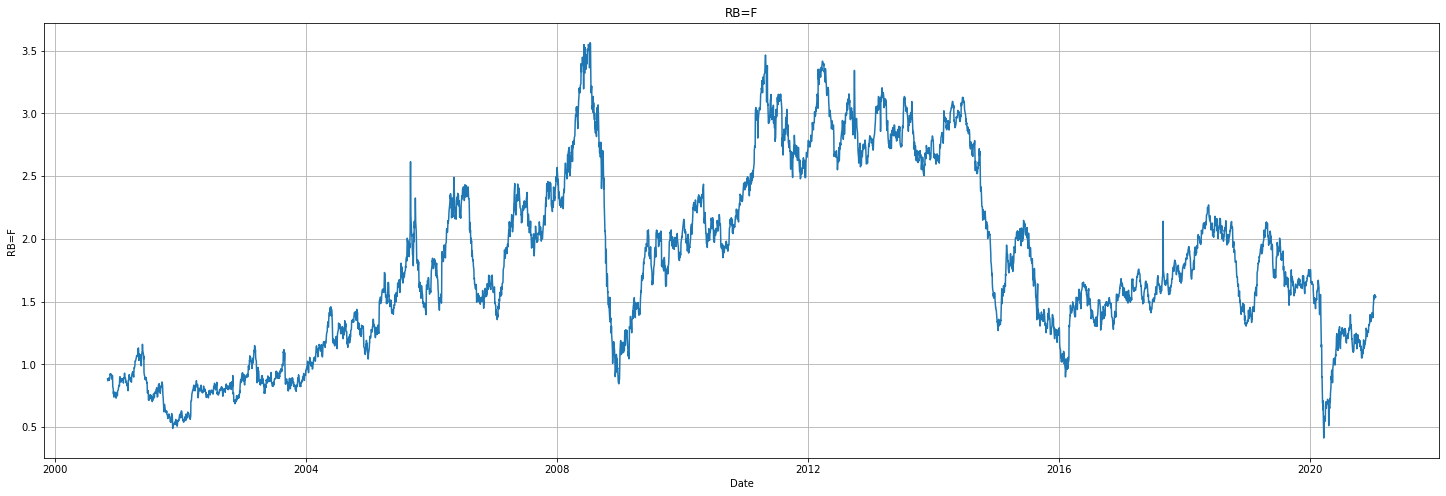

In [8]:
for commodity in commodity_tickers:
    plot_commodity(commodity)

In [9]:
df.to_csv('./Finance_Data/commodity_futures_prices.csv')